In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('micro_credit_defaulter.csv',sep='\t')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [3]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [4]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

Since the feature 'pcircle' has only one unique value for all the rows,it will be removed from the dataset.

In [5]:
df.drop('pcircle',axis=1,inplace=True)

Since the pdate column is in object format,converting it into day,month and year columns after converting it in datetime format.

In [6]:
import datetime
df['pday']=pd.to_datetime(df['pdate']).dt.day

In [7]:
df['pmonth']=pd.to_datetime(df['pdate']).dt.month

In [8]:
df['pyear']=pd.to_datetime(df['pdate']).dt.year

In [9]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pday,pmonth,pyear
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20-07-2016,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10-08-2016,8,10,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19-08-2016,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06-06-2016,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22-06-2016,22,6,2016


In [10]:
df['pyear'].unique()

array([2016], dtype=int64)

Droppping the pdate column as the month,date and the year have been extracted in separate columns.Further dropping the year column as all the data is from the year 2016.

In [11]:
df.drop('pdate',axis=1,inplace=True)
df.drop('pyear',axis=1,inplace=True)

In [12]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [13]:
df['Unnamed: 0'].nunique()

209593

Dropping the 'Unnamed: 0' column as it contains the index number of the rows

In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
#Checking for missing values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pday                    0
pmonth                  0
dtype: int64

Checking for outliers

In [16]:
df['msisdn'].nunique()

186243

Since mobile number of the users is highly unlikely to impact the loan default predictions in a positive way as it is unique for most of the users removing it from the dataset.

In [17]:
df.drop('msisdn',axis=1,inplace=True)

label


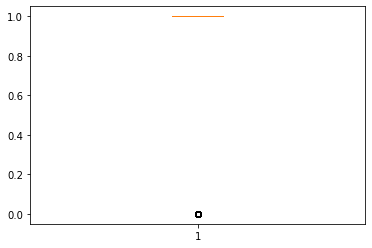

aon


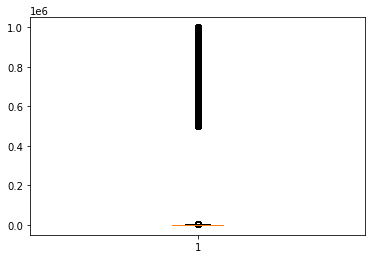

daily_decr30


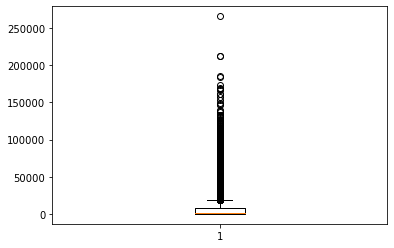

daily_decr90


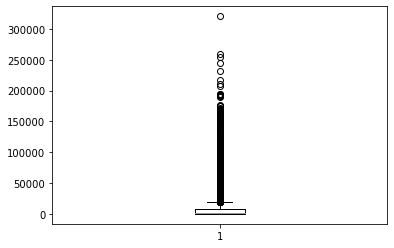

rental30


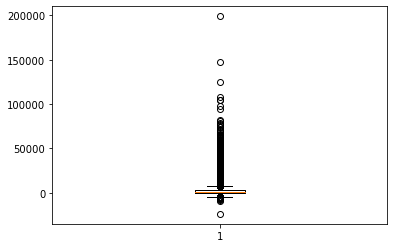

rental90


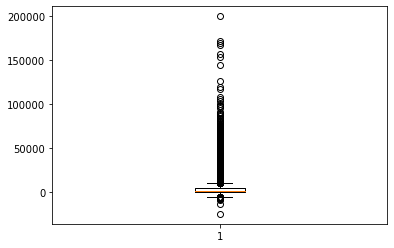

last_rech_date_ma


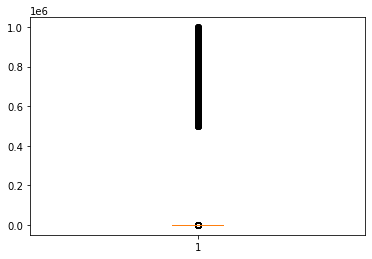

last_rech_date_da


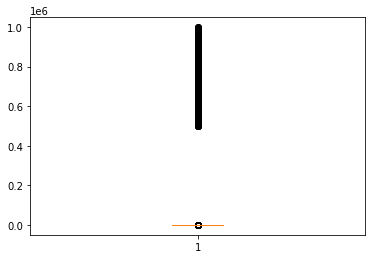

last_rech_amt_ma


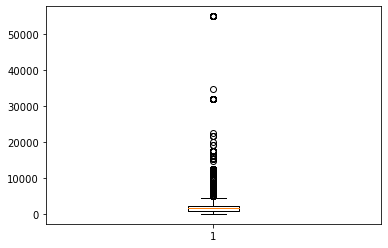

cnt_ma_rech30


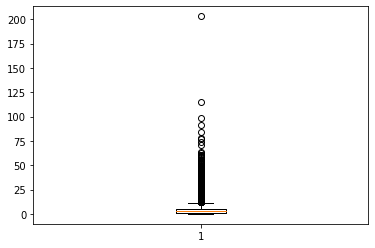

fr_ma_rech30


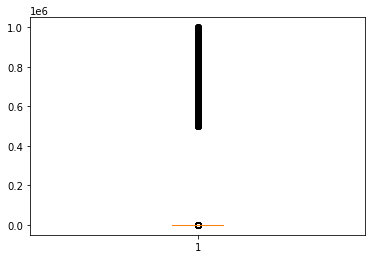

sumamnt_ma_rech30


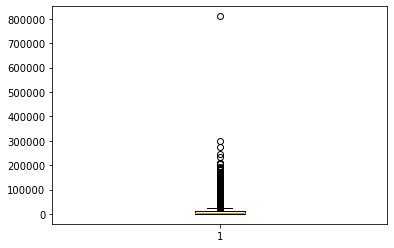

medianamnt_ma_rech30


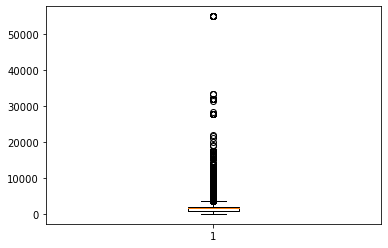

medianmarechprebal30


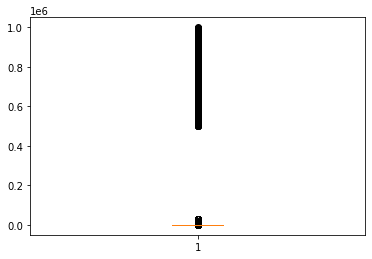

cnt_ma_rech90


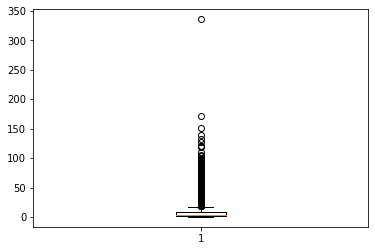

fr_ma_rech90


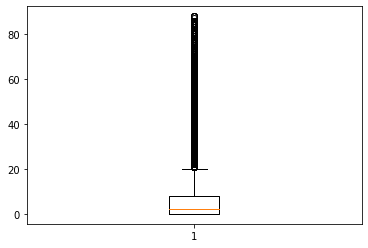

sumamnt_ma_rech90


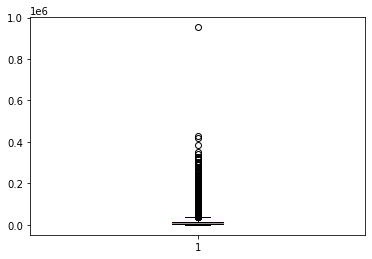

medianamnt_ma_rech90


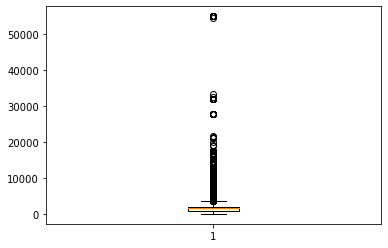

medianmarechprebal90


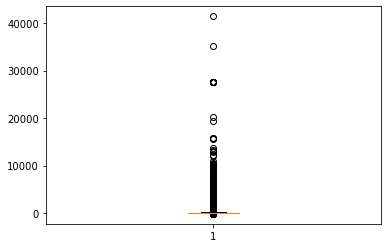

cnt_da_rech30


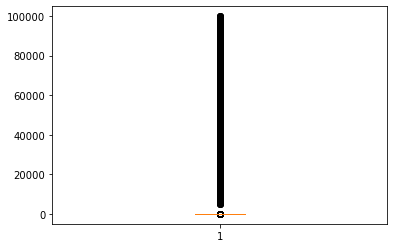

fr_da_rech30


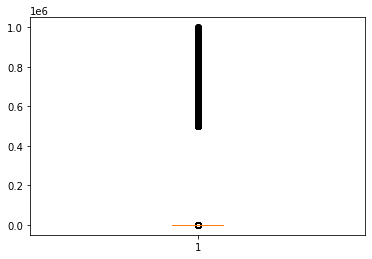

cnt_da_rech90


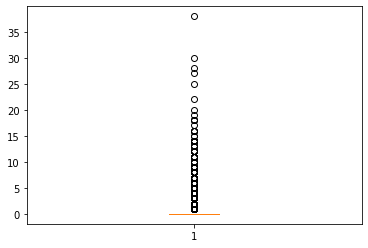

fr_da_rech90


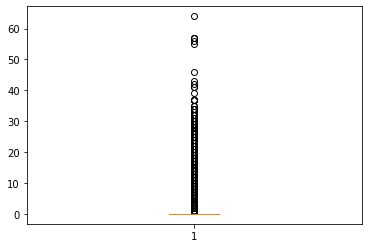

cnt_loans30


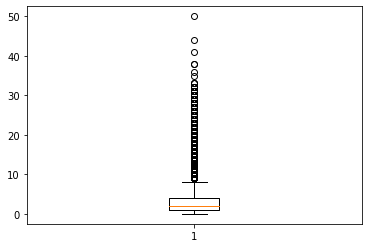

amnt_loans30


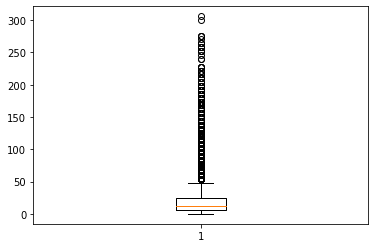

maxamnt_loans30


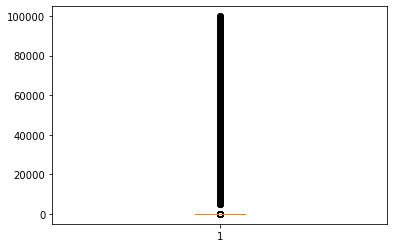

medianamnt_loans30


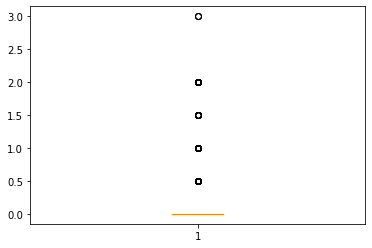

cnt_loans90


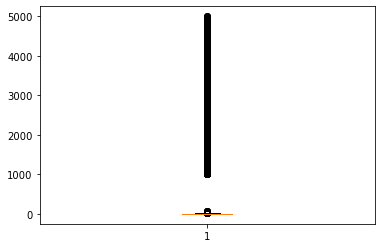

amnt_loans90


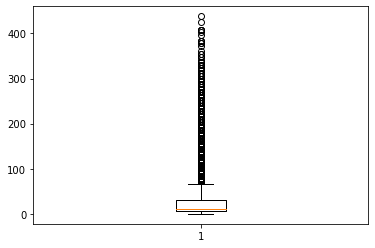

maxamnt_loans90


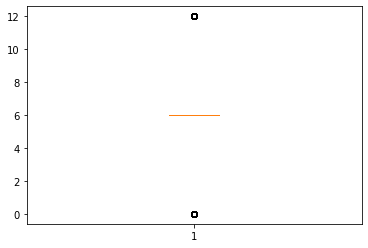

medianamnt_loans90


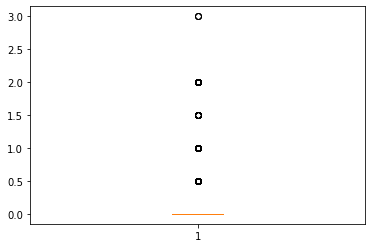

payback30


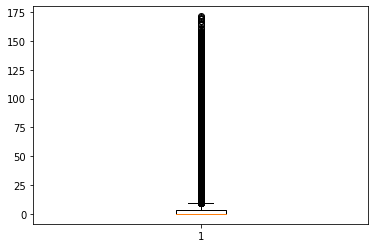

payback90


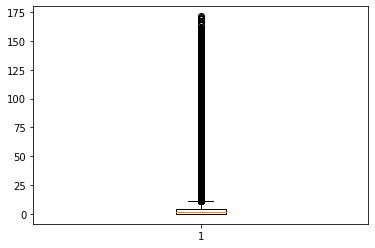

pday


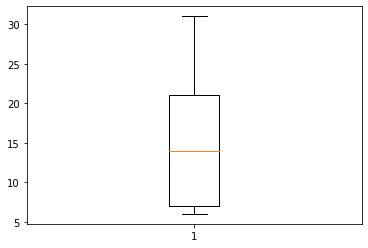

pmonth


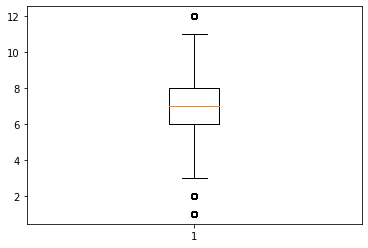

In [18]:
for i in df.columns:
    plt.boxplot(df[i])
    print(i)
    plt.show()

Presence of outliers was apparent in most of the columns

In [19]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.584008,6.612253
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,7.953396,2.371940
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,8.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,12.000000


In [20]:
from scipy.stats import zscore

In [21]:
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 2.39409346, 0.68096756,
        0.16347281],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.41923266, 0.82782543,
        1.42826341],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.41923266, 0.55523481,
        0.58506967],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.04735622, 1.8125623 ,
        0.16347281],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.59938541, 1.3096313 ,
        0.16347281],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.41923266, 0.95355818,
        0.16347281]])

In [22]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [23]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(161465, 35)

In [24]:
#Calculating the %age of data loss after removing the outliers
print((len(df)-len(df_new))/len(df)*100,"% data was lost")

22.962598941758554 % data was lost


Since the data loss was more than 20%(significantly high),we are not removing the outliers

DOING SOME VISUALIZATION

In [25]:
df.nunique()

label                        2
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

In [26]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


Separating the target feature(y) from the independent features(x)

In [27]:
y=df['label']
x=df.drop('label',axis=1)

In [28]:
x.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [29]:
list=x.columns

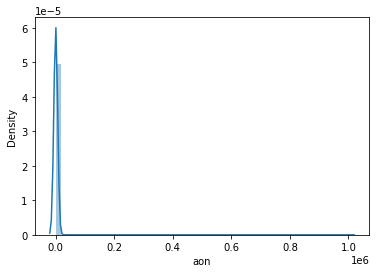

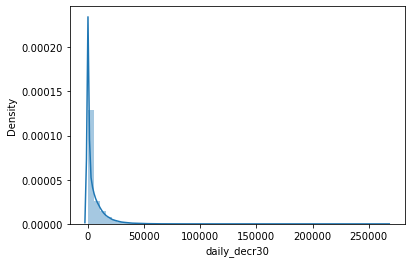

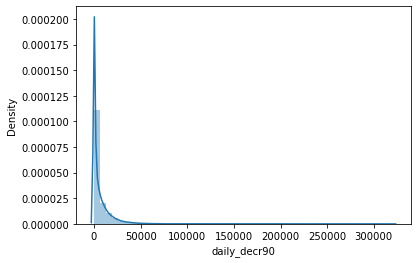

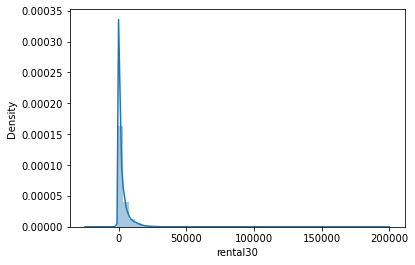

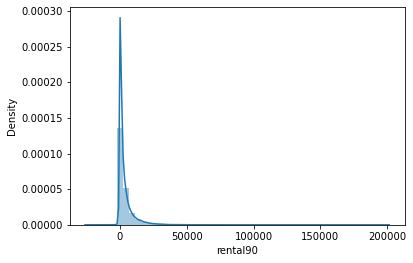

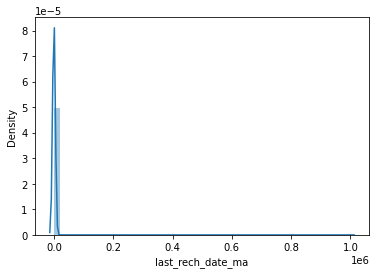

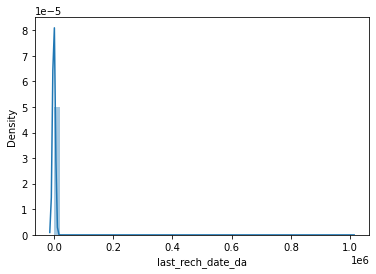

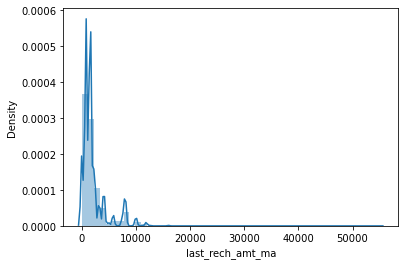

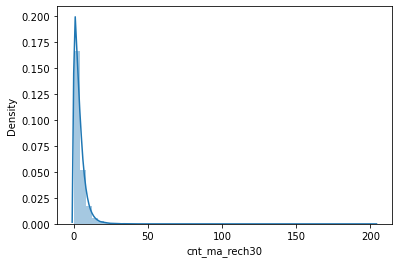

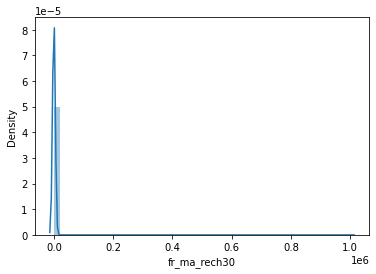

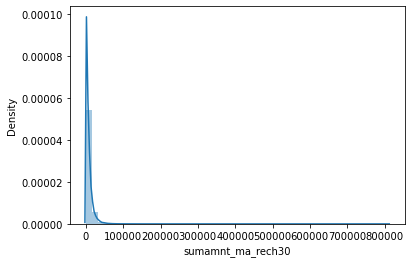

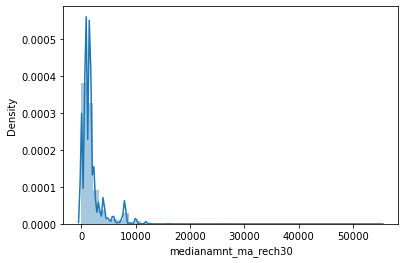

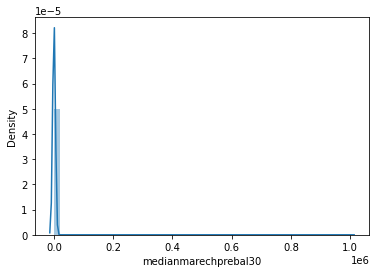

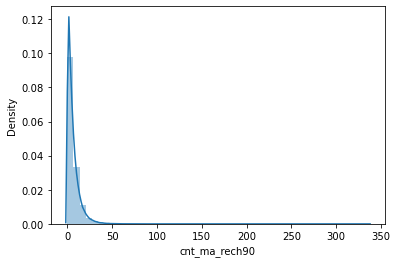

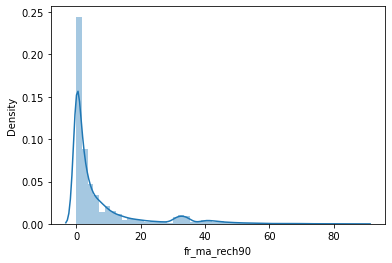

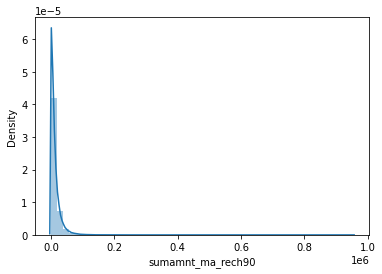

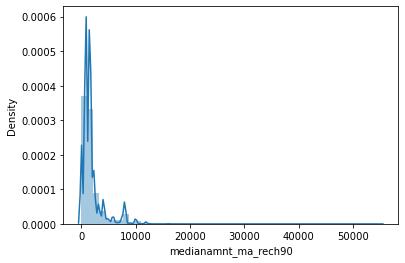

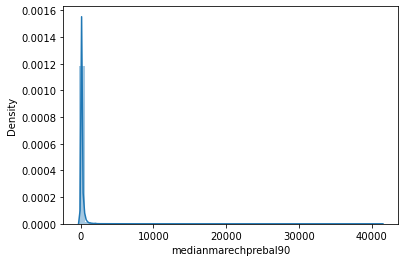

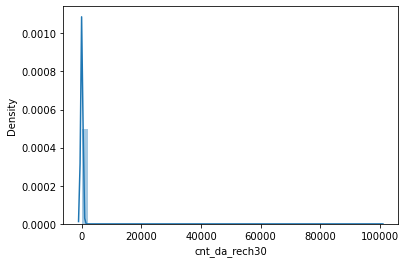

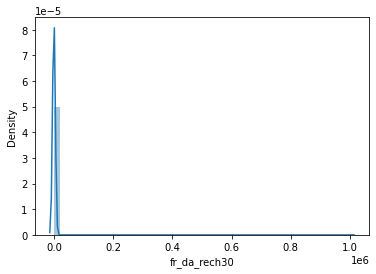

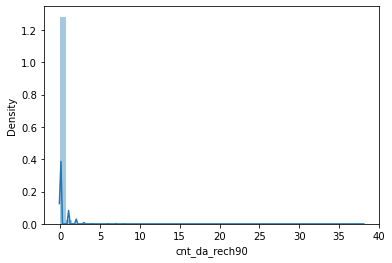

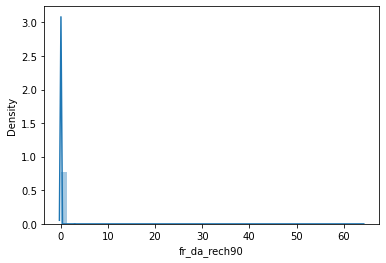

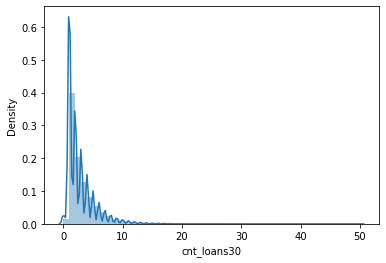

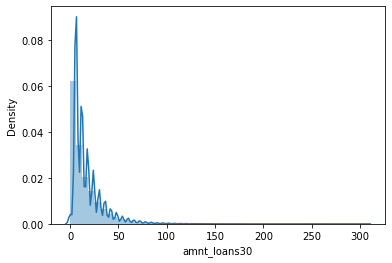

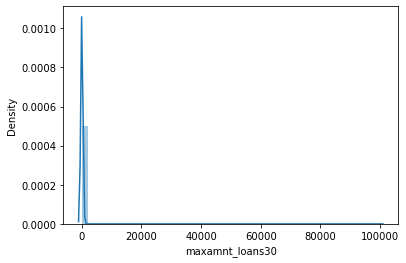

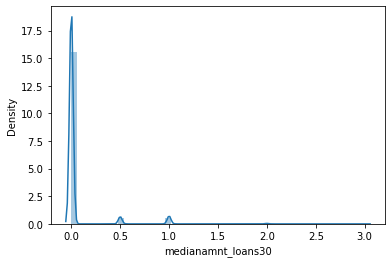

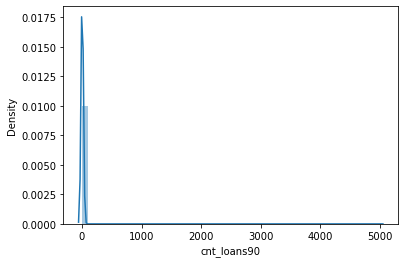

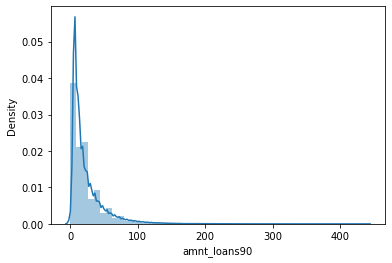

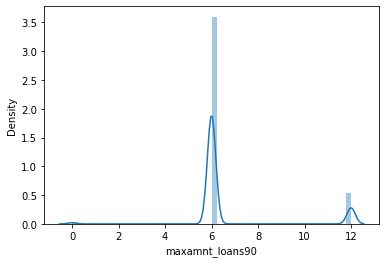

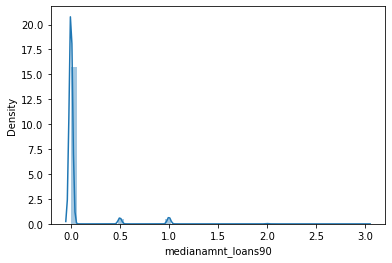

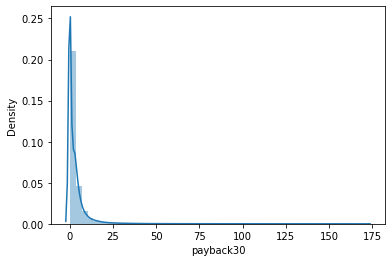

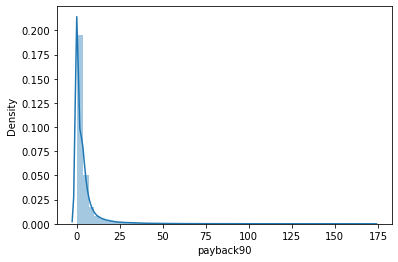

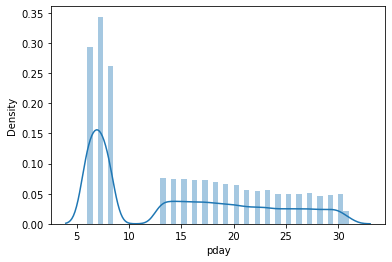

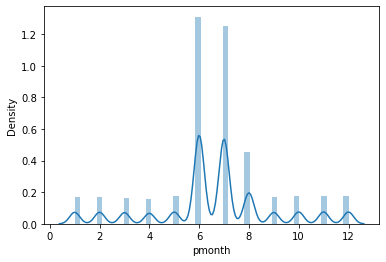

In [30]:
for i in x.columns:
    
    sns.distplot(x[i])
    plt.show()

In [31]:
#for i in x.columns:
 #   skew=x[i].skew()
  #  mini=x[i].min()
   # if(skew>0.5):
    #    print(i)
     #   x[i]=np.sqrt(x[i])
        

We are using median in place of mean as the outliers have not been removed from the dataset.

In [32]:
print(df['aon'].min())
print(df['aon'].max())

-48.0
999860.7552


Observation:
    The aon feature has unrealistic values present as the age cannot be negative nor can it be 999860.8 days(2739 years approx.).
    Using zscore to filter the outliers.

In [33]:
#dropping the rows having negative values
neg=np.where(df['aon']<0)
print(neg)

(array([    30,    197,    322, ..., 209240, 209421, 209514], dtype=int64),)


In [34]:
negative=[]
unreal=[]
for i in range(0,len(df['aon'])):
    if(df['aon'][i]<0):
        negative.append(i)
    if(df['aon'][i]>15000):
        unreal.append(i)
print(len(negative))
print(len(unreal))

1539
2089


In [35]:
df.drop(negative,inplace=True)
df.shape

(208054, 35)

Since the first telecommunications network was established in japan in 1979(15,000 days approx till 23/11/2021),any value above it cannot be realistic.Hence, checking for the unrealistic values above it and removing them. 

In [36]:
df.drop(unreal,inplace=True)
df.shape

(205965, 35)

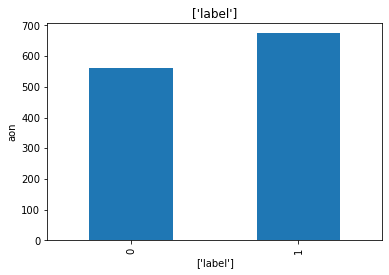

In [37]:
df.groupby(['label'])['aon'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('aon')
plt.title(['label'])
plt.show()


<AxesSubplot:xlabel='aon', ylabel='label'>

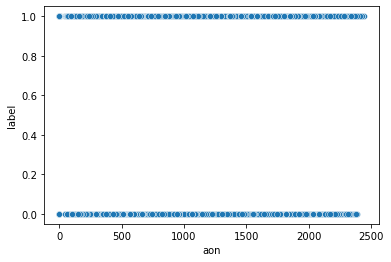

In [38]:
sns.scatterplot(x='aon',y='label',data=df)


Observation:
    The mean age on cellular network(in days) is lower for those who fail to repay the loan.

In [39]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,205965.00000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000,205965.000000
mean,0.87678,660.204418,5418.970439,6126.027913,2703.868611,3499.832603,3757.109487,3720.411908,2071.969291,4.000316,3751.684485,7751.888306,1819.004336,3837.007794,6.353667,7.718734,12476.016275,1870.827468,92.473530,262.608304,3746.412009,0.041760,0.045483,2.772568,18.044367,275.405309,0.053706,18.502889,23.784633,6.708732,0.045746,3.410484,4.339492,14.609866,6.618027
std,0.32869,497.733000,9234.919007,10941.949920,4317.511242,5782.956171,53897.278967,53435.847380,2373.443428,4.264890,53740.528893,10150.590948,2072.302397,53919.577234,7.210157,12.565174,16890.666068,2083.181714,371.460811,4187.119304,53859.013433,0.398599,0.947527,2.558881,17.408388,4253.444944,0.217330,224.674821,26.538074,2.110735,0.199866,8.794551,10.297683,7.952529,2.367104
min,0.00000,1.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.00000,248.000000,43.703333,43.914667,285.130000,306.020000,1.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,11.000000,2.000000,0.000000,2319.000000,773.000000,14.830000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.00000,525.000000,1506.186667,1534.000000,1091.760000,1345.450000,3.000000,0.000000,1539.000000,3.000000,2.000000,4633.000000,1539.000000,34.000000,4.000000,2.000000,7327.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000
75%,1.00000,967.000000,7305.366667,7884.450000,3376.110000,4226.250000,7.000000,0.000000,2309.000000,5.000000,6.000000,10019.000000,1924.000000,83.500000,9.000000,8.000000,16126.000000,1924.000000,79.670000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,8.000000
max,1.00000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,12.000000


OBSERVATIONS:
    1)The features -daily_decr30,daily_decr90 cannot be negative as the average amount spent from main account cannot be less than 0.
    2)The feature-last_rech_date_ma,last_rech_date_da cannot be negative as the number of days since last recharge can never be negative.Also,the number of days since last recharge cannot be greater than (15,000days till 23/11/2021) as the first telecommunications network was established in japan in 1979,hence any value above it will be unrealistic.
    
    3)The features -fr_ma_rech30 is providing the same information as 'cnt_ma_rech30'-Number of times main account got recharged in last 30 days	is same as the 'fr_ma_rech30'-Frequency of main account recharged in last 30 days.
    Here,cnt_ma_rech30 will be preferred as fr_ma_rech30 seems to posess unreal maximum value and standard deviation.
    4)The features-fr_ma_rech90	Frequency of main account recharged in last 90 days and cnt_ma_rech90	Number of times main account got recharged in last 90 days	are providing the same information as the frequency is same as the number of times the main  account was recharged over 90 days.
    5)The features -cnt_da_rech30(Number of times data account got recharged in last 30 days) and fr_da_rech30(Frequency of data account recharged in last 30 days)	provide the same information and also exhibit unreal maximum values.Hence,it is best suitable to discard them from the dataset.
    6)The features-cnt_da_rech90(Number of times data account got recharged in last 90 days) provide the same information as the fr_da_rech90(Frequency of data account recharged in last 90 days).
    7)The feature maxamnt_loans30(maximum amount of loan taken by the user in last 30 days) has unreal values as the amount of loan can be either 5 or 10 but the 25th,50th and the 75th percentile of the column have 6 as their value.Also,the maximum value for the feature is also unreal(99864.560860).Hence,dropping the column will be the best course of action as most of the data is unreal.
    8)The feature-payback30(Average payback time in days over last 30 days) and payback90(Average payback time in days over last 90 days) both have a maximum value of 171(approx) which is not possible as average payback time cannot be more than time period of observation(30 and 90) respectively.
    9)The feature-daily_decr30(Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)) has unreal values present as the minimum value for the daily average expenditure cannot be less than zero.Also,the maximum value(265926.00) too seems quite unusual.
    10)The feature-daily_decr90(Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)) has unreal values present as the minimum value for the daily average expenditure cannot be less than zero.Also,the maximum value(320630.00) too seems quite unusual.
    

Working on handling the aforementioned problems.

In [40]:
df=df.reset_index()

In [41]:
for i in range(0,len(df['daily_decr30'])):
    if(df['daily_decr30'][i]<0):
        df.drop(i,inplace=True)
print(len(df))

204154


In [42]:
df=df.reset_index()


In [43]:
for i in range(0,len(df['daily_decr90'])):
    if(df['daily_decr90'][i]<0):
        df.drop(i,inplace=True)
print(len(df))

204154


In [44]:
df['daily_decr30'][95]

12.42033333

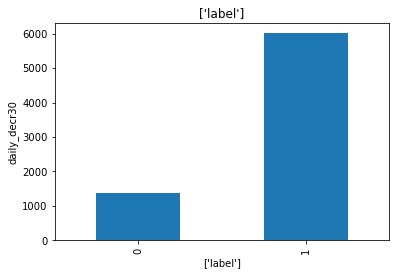

In [45]:
df.groupby(['label'])['daily_decr30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('daily_decr30')
plt.title(['label'])
plt.show()


OBSERVATION:
    The defaulters had an average daily spending from main account in between 1000-1500 as inferred fro the feature:daily_decr30(Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)) 


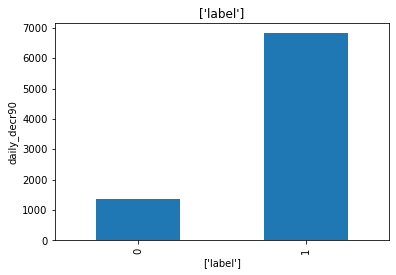

In [46]:
df.groupby(['label'])['daily_decr90'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('daily_decr90')
plt.title(['label'])
plt.show()


OBSERVATION: The defaulters had an average daily spending from main account in between 1000-1500 as inferred fro the feature:daily_decr90(Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah))

<AxesSubplot:xlabel='rental30', ylabel='Density'>

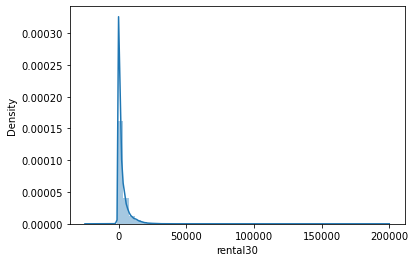

In [47]:
sns.distplot(df['rental30'])

Comparing medians as the means can be misleading due to an unrealistic maximum value.

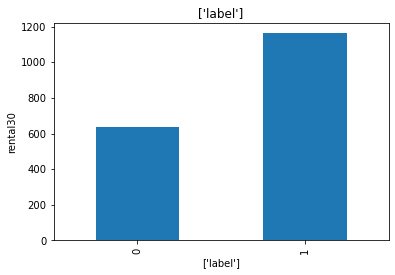

In [48]:
df.groupby(['label'])['rental30'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('rental30')
plt.title(['label'])
plt.show()


<AxesSubplot:xlabel='rental30', ylabel='label'>

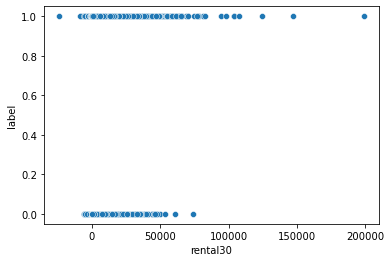

In [49]:
sns.scatterplot(y='label',x='rental30',data=df)

OBSERVATION:
    Most defaulters had a lower account balance(most of it between 0 and 50,000).

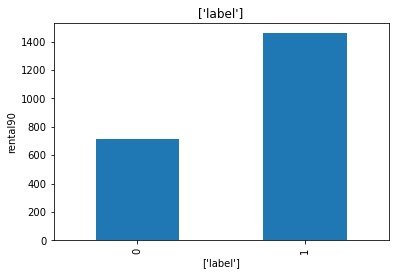

In [50]:
df.groupby(['label'])['rental90'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('rental90')
plt.title(['label'])
plt.show()


<AxesSubplot:xlabel='rental90', ylabel='label'>

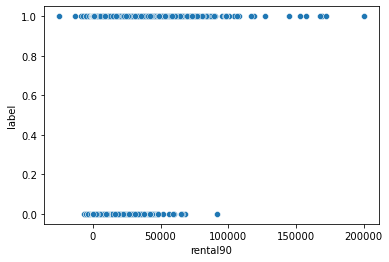

In [51]:
sns.scatterplot(y='label',x='rental90',data=df)

OBSERVATION :
    Most defaulters had a lower(almost half) Average main account balance over last 90 days as compared to the ones who paid their loan in time.
    The defaulters mostly ranged between 0 and60,000) 

In [52]:
drop_index=[]
for i in range(0,len(df['last_rech_date_ma'])):
    if(df['last_rech_date_ma'][i]<0):
        drop_index.append(i)
    elif (df['last_rech_date_ma'][i]>15000):
        drop_index.append(i)
print(len(drop_index))

2307


In [53]:
for i in drop_index:
    df.drop(i,inplace=True)
print(len(df))

201847


In [54]:
df['last_rech_date_ma'].max()

113.0

In [55]:
df.drop('level_0',axis=1,inplace=True)

In [56]:
df=df.reset_index()

In [57]:
drop_index2=[]
for i in range(0,len(df['last_rech_date_da'])):
    if(df['last_rech_date_da'][i]<0):
        drop_index2.append(i)
    elif (df['last_rech_date_da'][i]>15000):
        drop_index2.append(i)
print(len(drop_index2))

1028


In [58]:
for i in drop_index2:
    df.drop(i,inplace=True)
print(len(df))

200819


In [59]:
print(df['last_rech_date_da'].max())
print(df['last_rech_date_da'].min())

115.0
0.0


Here we have dropped the values greater than 15,000 as the first telecommunications network was established in japan in 1979(15,000 days approx till 23/11/2021),hence, any value above it cannot be realistic.

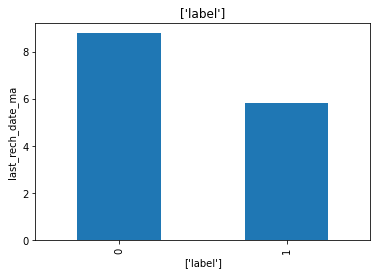

In [60]:
df.groupby(['label'])['last_rech_date_ma'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('last_rech_date_ma')
plt.title(['label'])
plt.show()


<AxesSubplot:xlabel='last_rech_date_ma', ylabel='label'>

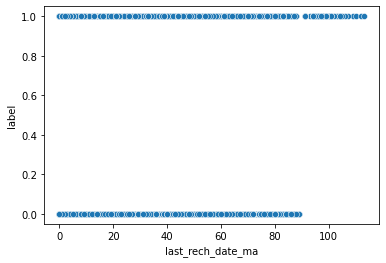

In [61]:
sns.scatterplot(x='last_rech_date_ma',y='label',data=df)

OBSERVATION:
    The defaulters had a mean-'average Number of days till last recharge of main account' over 80 days.


In [62]:
df['last_rech_date_ma'].min()

0.0

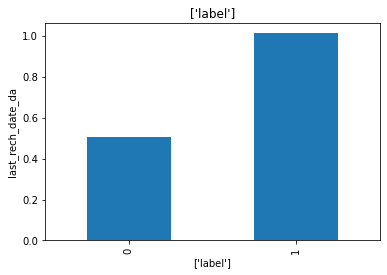

In [63]:
df.groupby(['label'])['last_rech_date_da'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('last_rech_date_da')
plt.title(['label'])
plt.show()


OBSERVATION:
    The defaulters had a mean 'Number of days till last recharge of data account' below 0.5.

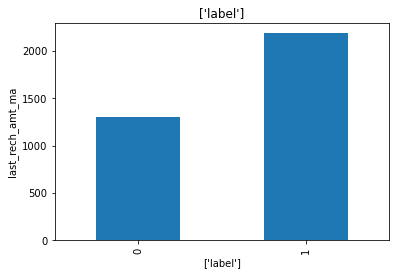

In [64]:
df.groupby(['label'])['last_rech_amt_ma'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('last_rech_amt_ma')
plt.title(['label'])
plt.show()


OBSERVATION:
    The defaulters had a lower mean(1400approx.) of 'Amount of last recharge of main account (in Indonesian Rupiah)' as compared to the ones who successfully paid their loans back.

The features -fr_ma_rech30 is providing the same information as 'cnt_ma_rech30'-Number of times main account got recharged in last 30 days    is same as the 'fr_ma_rech30'-Frequency of main account recharged in last 30 days.
Here,cnt_ma_rech30 will be preferred as fr_ma_rech30 seems to posess unreal maximum value and standard deviation and the other will be removed from the dataset.

In [65]:
df.drop('fr_ma_rech30',axis=1,inplace=True)

In [66]:
df.drop('level_0',axis=1,inplace=True)

Now comparing the mean Number of times main account got recharged in last 30 days of defaulters with the ones who payed their loans successfully.

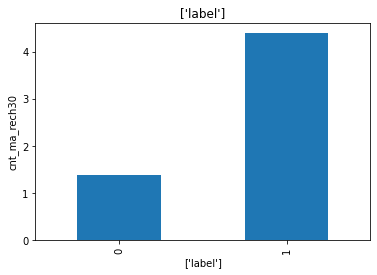

In [67]:
df.groupby(['label'])['cnt_ma_rech30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('cnt_ma_rech30')
plt.title(['label'])
plt.show()


<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='label'>

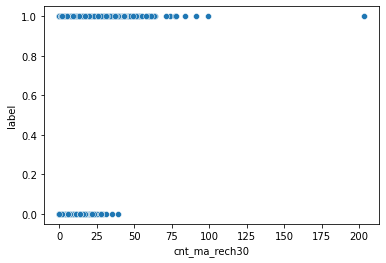

In [68]:
sns.scatterplot(x='cnt_ma_rech30',y='label',data=df)

OBSERVATION:
    The defaulters recharged their phones 1.5 on an average as compared to the ones with succesful repayment who recharged more than 4 times on an average.
    The number of recharges in the last 30days did not cross 40 for the defaulters.

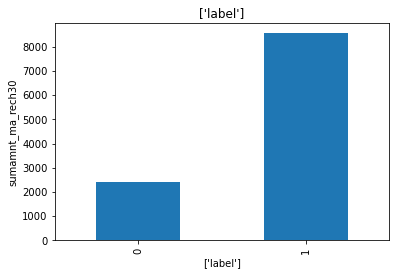

In [69]:
df.groupby(['label'])['sumamnt_ma_rech30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('sumamnt_ma_rech30')
plt.title(['label'])
plt.show()

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='label'>

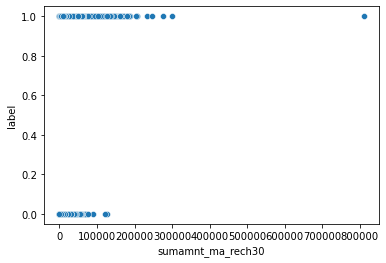

In [70]:
sns.scatterplot(x='sumamnt_ma_rech30',y='label',data=df)

OBSERVATION:
    The average Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) was less than 2500 for the defaulters as compared to the ones who payed back had an average of over 8,000.
    The highest total of recharge was around 1,20,000 for the defaulters.

In [71]:
df.describe()

,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000
mean,104789.995493,0.882421,660.496024,5502.241139,6220.174998,2732.687138,3540.949548,6.181098,0.954307,2083.924529,4.045977,7837.200628,1829.345538,3795.930420,6.430373,7.711606,12625.664190,1880.781686,92.347327,265.338164,3754.572408,0.042307,0.046355,2.797141,18.213655,274.109240,0.053976,18.616112,24.041022,6.719753,0.045917,3.460732,4.402998,14.616685,6.623522
std,60494.253094,0.322109,497.333925,9277.331822,10995.906093,4334.953223,5808.155410,9.312524,7.115454,2371.741102,4.268185,10189.903166,2067.932645,53604.641088,7.222665,12.480054,16956.971248,2079.594474,362.823561,4210.769359,53909.654654,0.402752,0.956814,2.568105,17.464535,4238.648227,0.217863,225.308512,26.626888,2.124949,0.200229,8.853338,10.363960,7.939871,2.371399
min,0.000000,0.000000,1.000000,0.000000,0.000000,-23737.140000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,52389.500000,1.000000,249.000000,47.605333,47.879667,297.500000,320.220000,1.000000,0.000000,770.000000,1.000000,1546.000000,770.000000,11.500000,2.000000,0.000000,2486.000000,773.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,104848.000000,1.000000,525.000000,1605.000000,1642.500000,1110.240000,1379.050000,3.000000,0.000000,1539.000000,3.000000,4717.000000,1539.000000,34.600000,4.000000,2.000000,7695.000000,1539.000000,36.500000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.800000,14.000000,7.000000
75%,157164.500000,1.000000,967.000000,7439.566333,8039.965000,3420.400000,4284.320000,7.000000,0.000000,2309.000000,6.000000,10106.000000,1924.000000,84.000000,9.000000,8.000000,16199.000000,1924.000000,80.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.600000,21.000000,8.000000
max,209592.000000,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,113.000000,115.000000,55000.000000,203.000000,810096.000000,55000.000000,999479.419300,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,12.000000


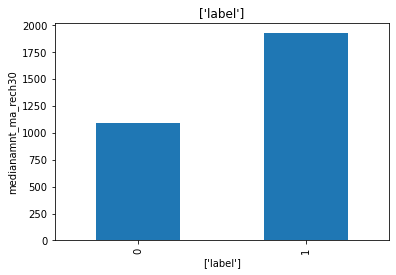

In [72]:
df.groupby(['label'])['medianamnt_ma_rech30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('medianamnt_ma_rech30')
plt.title(['label'])
plt.show()

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='label'>

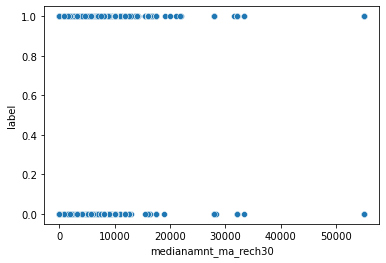

In [73]:
sns.scatterplot(x='medianamnt_ma_rech30',y='label',data=df)

OBSERVATION:
    The average Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah) was below 1200 for the defaulters whereas the successful repayers averaged over 1,800.

In [74]:
df.describe()

,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000,200819.000000
mean,104789.995493,0.882421,660.496024,5502.241139,6220.174998,2732.687138,3540.949548,6.181098,0.954307,2083.924529,4.045977,7837.200628,1829.345538,3795.930420,6.430373,7.711606,12625.664190,1880.781686,92.347327,265.338164,3754.572408,0.042307,0.046355,2.797141,18.213655,274.109240,0.053976,18.616112,24.041022,6.719753,0.045917,3.460732,4.402998,14.616685,6.623522
std,60494.253094,0.322109,497.333925,9277.331822,10995.906093,4334.953223,5808.155410,9.312524,7.115454,2371.741102,4.268185,10189.903166,2067.932645,53604.641088,7.222665,12.480054,16956.971248,2079.594474,362.823561,4210.769359,53909.654654,0.402752,0.956814,2.568105,17.464535,4238.648227,0.217863,225.308512,26.626888,2.124949,0.200229,8.853338,10.363960,7.939871,2.371399
min,0.000000,0.000000,1.000000,0.000000,0.000000,-23737.140000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,52389.500000,1.000000,249.000000,47.605333,47.879667,297.500000,320.220000,1.000000,0.000000,770.000000,1.000000,1546.000000,770.000000,11.500000,2.000000,0.000000,2486.000000,773.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,104848.000000,1.000000,525.000000,1605.000000,1642.500000,1110.240000,1379.050000,3.000000,0.000000,1539.000000,3.000000,4717.000000,1539.000000,34.600000,4.000000,2.000000,7695.000000,1539.000000,36.500000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.800000,14.000000,7.000000
75%,157164.500000,1.000000,967.000000,7439.566333,8039.965000,3420.400000,4284.320000,7.000000,0.000000,2309.000000,6.000000,10106.000000,1924.000000,84.000000,9.000000,8.000000,16199.000000,1924.000000,80.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.600000,21.000000,8.000000
max,209592.000000,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,113.000000,115.000000,55000.000000,203.000000,810096.000000,55000.000000,999479.419300,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,12.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x25a8de23910>,
 'caps': [<matplotlib.lines.Line2D at 0x25a8de23fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a8de23610>],
 'medians': [<matplotlib.lines.Line2D at 0x25a8deb56d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a8deb5a30>],
 'means': []}

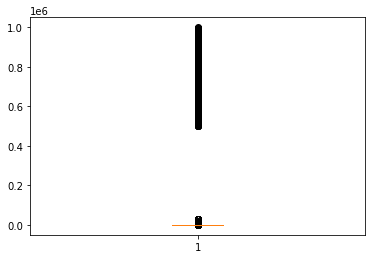

In [75]:
plt.boxplot(df['medianmarechprebal30'])

Comparing the medians as the feature shows presence of outliers.

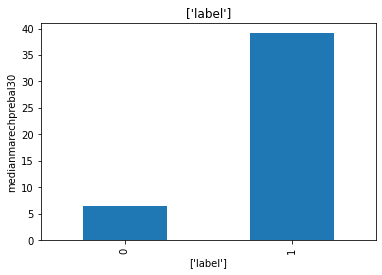

In [76]:
df.groupby(['label'])['medianmarechprebal30'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('medianmarechprebal30')
plt.title(['label'])
plt.show()

OBSERVATION:
    The median- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) significantly less for the defaulters(around 7).


The features-fr_ma_rech90    Frequency of main account recharged in last 90 days and cnt_ma_rech90    Number of times main account got recharged in last 90 days    are providing the same information as the frequency is same as the number of times the main  account was recharged over 90 days.

Comparing both the mean and median 

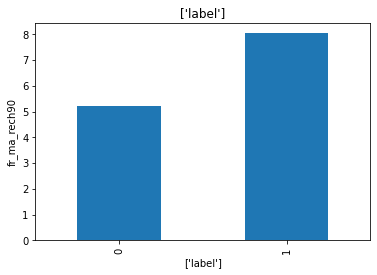

In [77]:
df.groupby(['label'])['fr_ma_rech90'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('fr_ma_rech90')
plt.title(['label'])
plt.show()

OBSERVATION:
    The defaulters had a lower mean frequency(5.5 approx.).

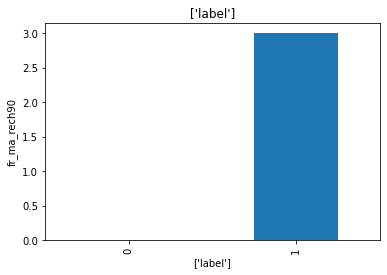

In [78]:
df.groupby(['label'])['fr_ma_rech90'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('fr_ma_rech90')
plt.title(['label'])
plt.show()

OBSERVATION:
    Around 50% of the defaulters did not recharge their phones in the last 90 days.

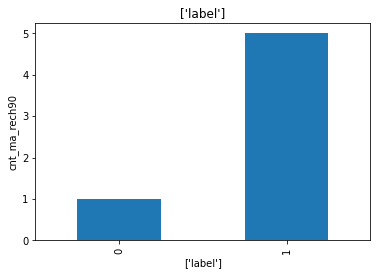

In [79]:
df.groupby(['label'])['cnt_ma_rech90'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('cnt_ma_rech90')
plt.title(['label'])
plt.show()

OBSERVATION:
    Around 50% of the defaulters did not recharge their phones more than 1 time.

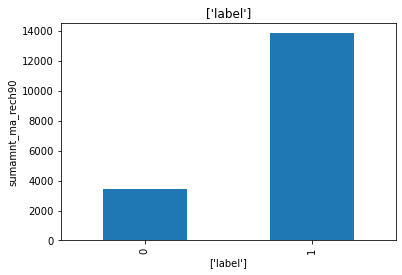

In [80]:
df.groupby(['label'])['sumamnt_ma_rech90'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('sumamnt_ma_rech90')
plt.title(['label'])
plt.show()

OBSERVATION:
    The defaulters had an average of less than 4000 Total amount of recharge in main account over last 90 days (in Indonasian Rupiah).

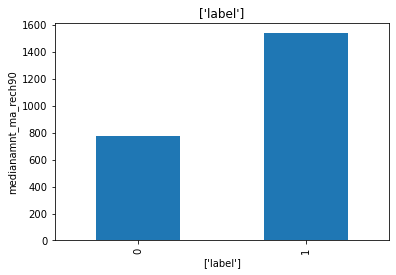

In [81]:
df.groupby(['label'])['medianamnt_ma_rech90'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('medianamnt_ma_rech90')
plt.title(['label'])
plt.show()

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='label'>

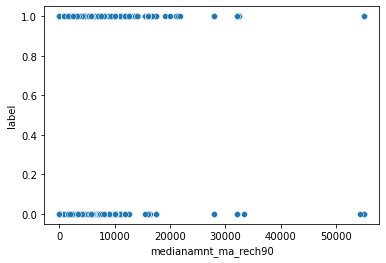

In [82]:
sns.scatterplot(x='medianamnt_ma_rech90',y='label',data=df)

OBSERVATION:
    Around 50% of the defaulters had an Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    lower than 800.

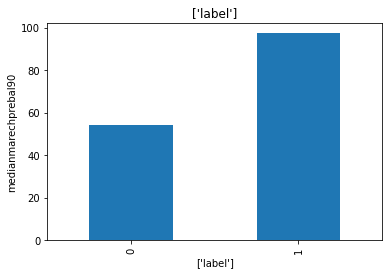

In [83]:
df.groupby(['label'])['medianmarechprebal90'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('medianmarechprebal90')
plt.title(['label'])
plt.show()

OBSERVATION:
    The average Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah) was lower for the defaulters(below 60).

The features -cnt_da_rech30(Number of times data account got recharged in last 30 days) and fr_da_rech30(Frequency of data account recharged in last 30 days)    provide the same information and also exhibit unreal maximum values.
Moreover,both the features have 0.0 as their 25th,75th and 50th percentile.Hence,dropping them will be the best course of action as similar information can be provided by the feature-cnt_da_rech90(Number of times data account got recharged in last 90 days).


In [84]:
print(np.where(df['cnt_da_rech30']==0))

(array([     0,      1,      2, ..., 200816, 200817, 200818], dtype=int64),)


In [85]:
drop=['cnt_da_rech30','fr_da_rech30']
df.drop(drop,axis=1,inplace=True)

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='count'>

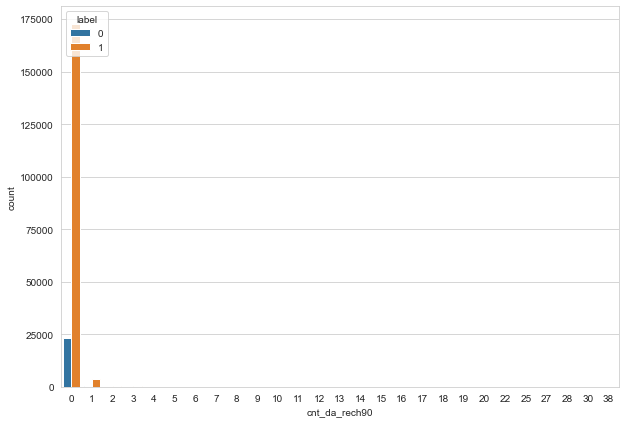

In [86]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(x='cnt_da_rech90',hue='label',data=df)

In [87]:
df['cnt_da_rech90'].value_counts()

0     195596
1       4054
2        541
3        223
4        148
5         73
6         48
7         35
8         30
9         18
14         9
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x25a8e468760>,
 'caps': [<matplotlib.lines.Line2D at 0x25a8e468e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a8e468400>],
 'medians': [<matplotlib.lines.Line2D at 0x25a8e46a520>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a8e46a880>],
 'means': []}

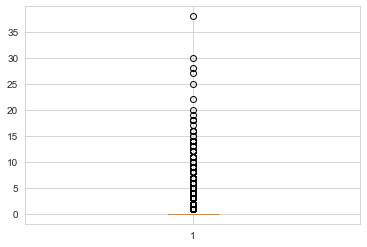

In [88]:
plt.boxplot(df['cnt_da_rech90'])

In [89]:
#calculating the percentage of zeros in the data
195596/len(df)*100

97.39915047878935

Since,over 97% of the data consists of '0' as the value and the feature also indicates presence of outliers,this column is likely to hamper the model learning more than facilitate it.
Hence,removing this feature from dataset.

<AxesSubplot:xlabel='fr_da_rech90', ylabel='count'>

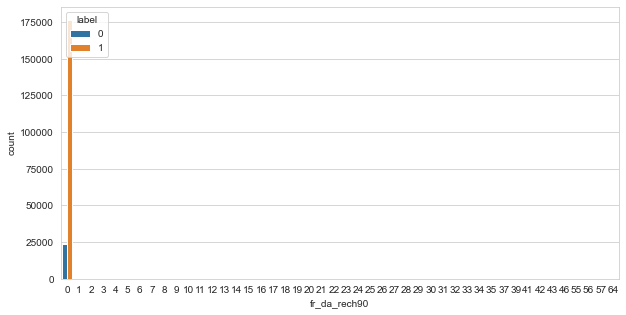

In [90]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='fr_da_rech90',hue='label',data=df)

In [91]:
df['fr_da_rech90'].value_counts()

0     199974
3         76
2         66
1         64
4         55
7         54
6         52
8         44
5         43
14        32
9         32
10        31
11        30
12        26
19        22
28        18
15        17
18        16
13        15
29        14
16        14
17        13
25        11
21        10
22        10
20         9
24         8
32         7
26         7
27         7
30         6
31         6
37         5
34         5
23         5
57         3
35         2
41         2
33         1
39         1
42         1
43         1
46         1
55         1
56         1
64         1
Name: fr_da_rech90, dtype: int64

In [92]:
#calculating the percentage of 0's present in the dataset
199974/len(df)*100

99.57922308148135

Since,over 99.5% of the data consists of '0' as the value and the feature also indicates presence of outliers,this column is likely to hamper the model learning more than facilitate it.Also,not much could be inferred from the visualization of this feature. Hence,removing this feature from dataset.

In [93]:
drop=['cnt_da_rech90','fr_da_rech90']
df.drop(drop,axis=1,inplace=True)

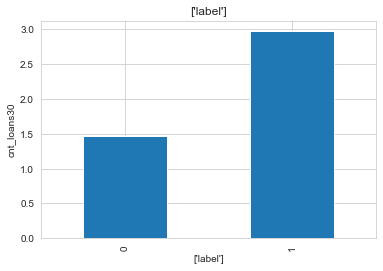

In [94]:
df.groupby(['label'])['cnt_loans30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('cnt_loans30')
plt.title(['label'])
plt.show()

OBSERVATION:
    The average number of loans taken by user in last 30 days was lower than 1.5 for the defaulters as compared to the 3.0 of the non defaulters.


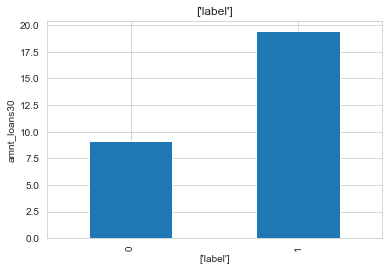

In [95]:
df.groupby(['label'])['amnt_loans30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('amnt_loans30')
plt.title(['label'])
plt.show()

In [96]:
df['amnt_loans30'].max()

306

Observation:
    The average Total amount of loans taken by user in last 30 days is lower for the defaulters(below 10.0) as compared to that of non defaulters(19.0approx)

In [97]:
df['maxamnt_loans30'].value_counts()

6.00000        171045
12.00000        25597
0.00000          3174
20674.40737         1
37689.17165         1
                ...  
25470.78343         1
77315.17319         1
64868.68808         1
86419.92005         1
98051.31404         1
Name: maxamnt_loans30, Length: 1006, dtype: int64

In [98]:
df['maxamnt_loans30'].max()

99864.56086

The maxamnt_loans30 features appears to posess unreal values as the only two options for loan are 5 and 10(indonesian rs)and for repayment(6 and 12).

In [99]:
df=df.reset_index()

In [100]:
np.where(df['maxamnt_loans30']>12.0)

(array([   111,    118,    138, ..., 200568, 200628, 200659], dtype=int64),)

In [101]:
#filtering the values other than 6 or 12 and 0 from the dataset
drop_col=[]
for i in range(0,len(df['maxamnt_loans30'])):
    if(df['maxamnt_loans30'][i]!=6.0)and(df['maxamnt_loans30'][i]!=12.0)and(df['maxamnt_loans30'][i]!=0.0):
        drop_col.append(i)
        
        
   
print(len(drop_col))
        

1003


In [102]:
df.drop(drop_col,inplace=True)
len(df)

199816

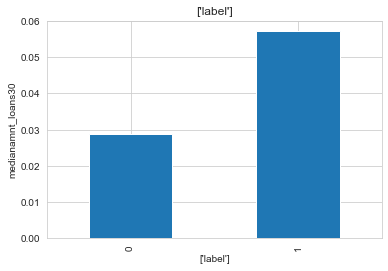

In [103]:
df.groupby(['label'])['medianamnt_loans30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('medianamnt_loans30')
plt.title(['label'])
plt.show()

OBSERVATION:
    The average Median of amounts of loan taken by the user in last 30 days was lower(below 0.03)for defaulters as compared to the non-defaulters(around 0.06).

Since the maximum value for cnt_loans90 appears to be unreal(outlier),using the medians to compare

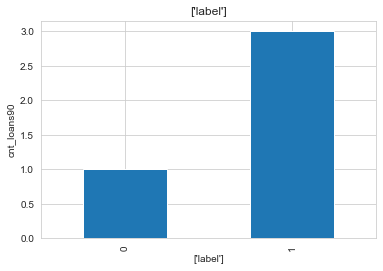

In [104]:
df.groupby(['label'])['cnt_loans90'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('cnt_loans90')
plt.title(['label'])
plt.show()

OBSERVATION:
    50% of the defaulters had taken only 1 loan in the last 90 days.

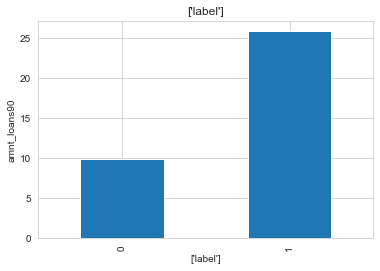

In [105]:
df.groupby(['label'])['amnt_loans90'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('amnt_loans90')
plt.title(['label'])
plt.show()

<AxesSubplot:xlabel='amnt_loans90', ylabel='label'>

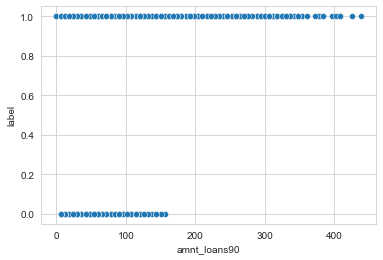

In [106]:
sns.scatterplot(x='amnt_loans90',y='label',data=df)

OBSERVATION:
    The defaulters had an average(mean) total amount of loans taken in last 90 days below 10 whereas the non-defaulters had it over 25.
    The maximum total amount of loans taken by defaulters in last 90 days was below 180.


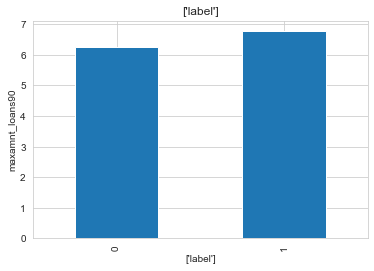

In [107]:
df.groupby(['label'])['maxamnt_loans90'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('maxamnt_loans90')
plt.title(['label'])
plt.show()

OBSERVATION:
    No conclusive observation was depicted in this plot.

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

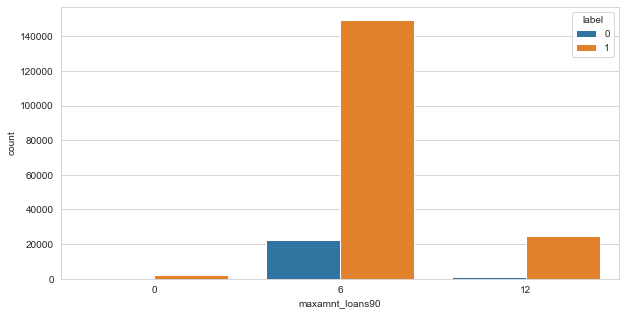

In [108]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='maxamnt_loans90',hue='label',data=df)

In [109]:
df['maxamnt_loans90'].value_counts()

6     171876
12     25958
0       1982
Name: maxamnt_loans90, dtype: int64

OBSERVATION:
    1)More than 80% of customers had taken a maximum loan of rs 6.
    2)Majority of defaulters had taken a maximum amount of rs 6(indonesian).

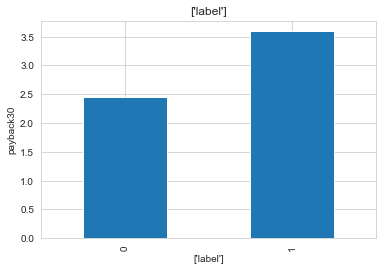

In [110]:
df.groupby(['label'])['payback30'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('payback30')
plt.title(['label'])
plt.show()

<AxesSubplot:xlabel='payback30', ylabel='label'>

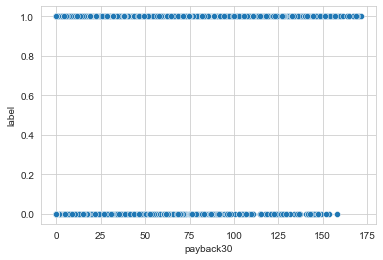

In [111]:
sns.scatterplot(x='payback30',y='label',data=df)

OBSERVATION:
    The defaulters had a lower mean of Average payback time in days over last 30 days(below 2.5).

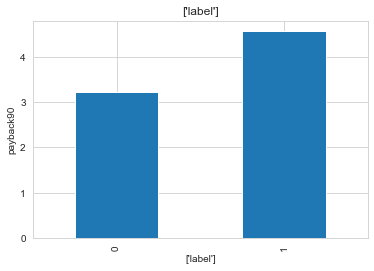

In [112]:
df.groupby(['label'])['payback90'].mean().plot.bar()
plt.xlabel(['label'])
plt.ylabel('payback90')
plt.title(['label'])
plt.show()

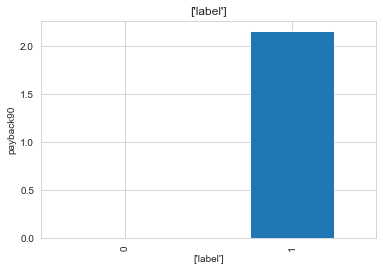

In [113]:
df.groupby(['label'])['payback90'].median().plot.bar()
plt.xlabel(['label'])
plt.ylabel('payback90')
plt.title(['label'])
plt.show()

OBSERVATIONS:
    1)The defaulters had a lower mean of Average payback time in days over last 90 days as compared to the non-defaulters.
    2)At least 50% of the defaulters did not pay their loan back.


In [114]:
df['pday'].nunique()

22

In [115]:
df.describe()

,level_0,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.00000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000,199816.000000
mean,100925.098996,104787.739756,0.882392,660.572822,5502.894489,6220.835438,2733.036721,3541.615704,6.183164,0.954513,2083.849782,4.045982,7836.352449,1829.04867,3799.279767,6.430611,7.710213,12625.441026,1880.687402,92.300650,2.797103,18.213677,6.673309,0.053887,18.576947,24.043900,6.719942,0.045812,3.461850,4.404246,14.614696,6.623429
std,58275.227266,60495.334686,0.322144,497.282013,9278.663250,10997.568823,4336.115089,5810.331738,9.313686,7.116463,2372.526808,4.267776,10191.251518,2068.20277,53624.526435,7.222857,12.478878,16960.989457,2080.246013,363.289432,2.568292,17.468177,2.174908,0.217713,224.992191,26.642469,2.124979,0.200038,8.861815,10.369576,7.938289,2.371358
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-23737.140000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,50459.750000,52389.750000,1.000000,249.000000,47.609000,47.891833,297.695000,320.450000,1.000000,0.000000,770.000000,1.000000,1546.000000,770.00000,11.500000,2.000000,0.000000,2486.000000,773.000000,15.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,100949.500000,104852.500000,1.000000,525.000000,1605.824334,1644.550000,1111.170000,1379.700000,3.000000,0.000000,1539.000000,3.000000,4717.000000,1539.00000,34.570000,4.000000,2.000000,7695.000000,1539.000000,36.500000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.800000,14.000000,7.000000
75%,151390.250000,157155.250000,1.000000,967.000000,7438.512750,8038.790000,3420.225000,4285.590000,7.000000,0.000000,2309.000000,6.000000,10105.000000,1924.00000,84.000000,9.000000,8.000000,16197.000000,1924.000000,80.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.600000,21.000000,8.000000
max,201846.000000,209592.000000,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,113.000000,115.000000,55000.000000,203.000000,810096.000000,55000.00000,999479.419300,336.000000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,12.000000


<AxesSubplot:xlabel='pday', ylabel='count'>

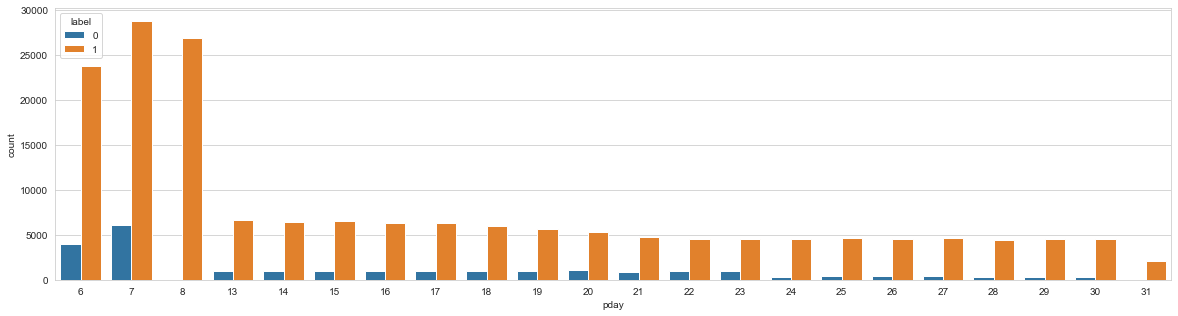

In [116]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.countplot(x='pday',hue='label',data=df)

OBSERVATIONS:
    1)The highest number of loans were granted on 7th,8th and 6th respectively.
    2)The highest number of default cases were on 7th followed by 6th.
    3)The ratio of success to failure remained somewhat the same for all the dates.
    4)No default cases were recorded on the loans granted on the 8th day of a month.

<AxesSubplot:xlabel='pmonth', ylabel='count'>

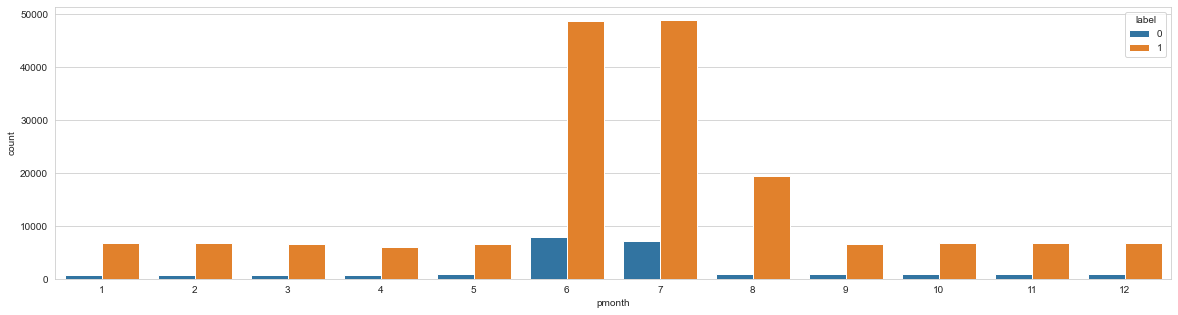

In [120]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.countplot(x='pmonth',hue='label',data=df)

OBSERVATION:
    Highest number of loans were granted on the 6th and the 7th months of the year.

Proceeding to visualising the correlation between features.

<AxesSubplot:>

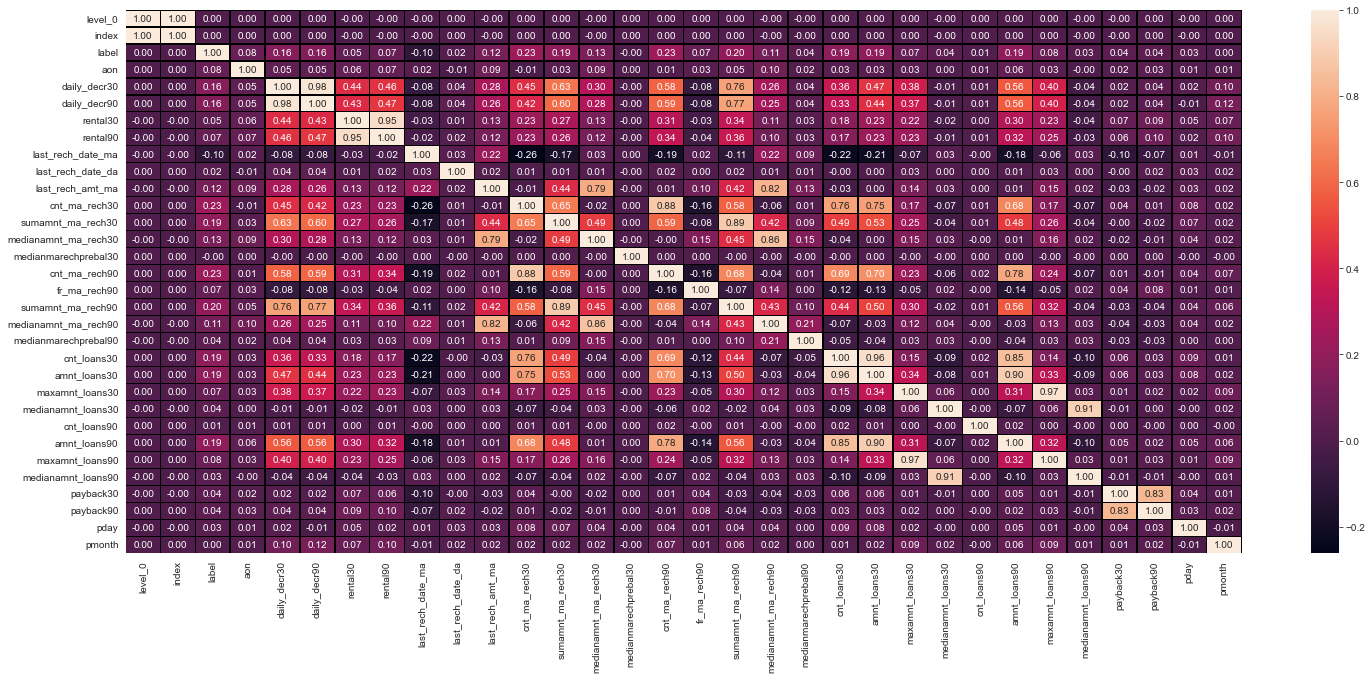

In [121]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

THEIR APPEARS TO BE A VERY HIGH COLLINEARITY AMONGST THE INDEPENDENT VARIABLES.
THE FEATURES THAT HAVE BEEN OBSERVED FOR 30 AND 90 DAYS ARE ALL HIGHLY CORRELATED AS THE 90 DAY OBSERVATION PERIOD APPEARS TO COVER THE INFORMATION PROVIDED BY THE ONES THAT ARE PROVIDING THE SAME INFORMATION FOR A  30 DAY PERIOD.HENCE,DROPPING THE COLUMNS WHICH PROVIDE DATA FOR 30 DAYS AS THE INFORMATION IS ALREADY BEING PROVIDED BY THE FEATURE WITH 90DATA OF SIMILAR INFORMATION.  

In [130]:
count=0
columns=df.columns
drop_col=[]
for i in columns:
    if(i[-2:]=='30'):
        
        for j in columns:
            if(i[:-2]==j[:-2]):
                count=count+1
    if(count==2):
        drop_col.append(i)
        count=0
        
        
    
drop_col
        
        
    

['daily_decr30',
 'rental30',
 'cnt_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'payback30']

In [131]:
drop_col.pop(5)

'medianmarechprebal30'

In [133]:
#dropping the features showing multicollinearity
df.drop(drop_col,axis=1,inplace=True)

<AxesSubplot:>

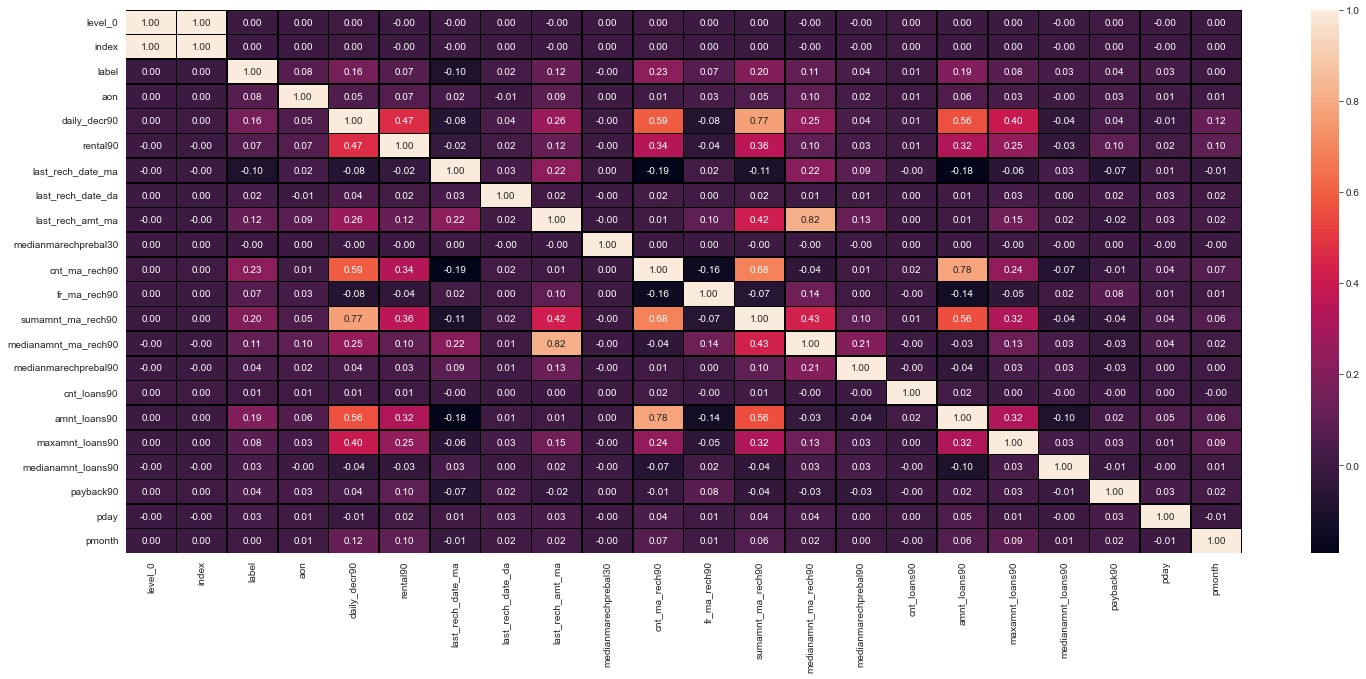

In [134]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [135]:
#dropping the columns created due to reseting the index
df.drop('level_0',axis=1,inplace=True)
df.drop('index',axis=1,inplace=True)

Proceeding to feature scaling using standard scaler(data normalization)

In [136]:
#separating target feature from the dependent features
y=df['label']
x=df.drop('label',axis=1)

Since the target feature is imbalanced,using near_miss(downsampling) to balance the dataset as upsampling will only increase the size of the already large dataset

In [144]:
y.value_counts()

1    176316
0     23500
Name: label, dtype: int64

In [153]:
#from imblearn.under_sampling import NearMiss
#nm=NearMiss()
#trainx,trainy=nm.fit_resample(x,y)

In [154]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)


In [155]:
trainy.value_counts()

1    176316
0    176316
Name: label, dtype: int64

In [156]:
#performing scaling of the independent features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(trainx)
scaled_data=sc.transform(trainx)
x_scaled=pd.DataFrame(scaled_data,columns=x.columns)
x_scaled.head()

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pday,pmonth
0,-0.708617,-0.118388,-0.527917,-0.489187,-0.12822,-0.088650,-0.073484,-0.397884,1.238115,-0.391979,-0.033422,-0.168727,-0.067368,-0.267484,-0.290183,-0.220749,2.471500,0.795995,0.235584
1,0.213089,0.903319,0.120848,1.207322,-0.12822,1.779395,-0.072531,-0.560476,-0.555865,-0.201059,2.059115,-0.030742,-0.072051,-0.267484,3.151643,-0.220749,-0.382196,-0.852839,1.607376
2,-0.157688,-0.306403,-0.406904,-0.394936,-0.12822,-0.088650,-0.072437,-0.560476,-0.555865,-0.500442,-0.033422,-0.017134,-0.072051,-0.540433,-0.290183,-0.220749,-0.382196,0.658592,0.692848
3,-0.773555,-0.461670,-0.546959,3.186583,-0.12822,-0.348980,-0.073618,-0.560476,-0.555865,-0.542164,-0.325037,-0.181613,-0.067368,-0.267484,-0.290183,-0.220749,-0.382196,-1.127645,-0.221680
4,0.705364,-0.447078,-0.369320,-0.300686,-0.12822,0.249955,-0.073101,0.577667,-0.385010,1.047005,0.631086,-0.097853,-0.043951,1.097261,-0.290183,-0.220749,-0.152588,1.070801,-0.221680


PROCEEDING TO MODEL TESTING AND TRAINING

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,trainy,test_size=.33,random_state=42)

Logistic Regression

In [162]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

accuracy score: 0.7600305923398843
[[47090 11058]
 [16867 41354]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77     58148
           1       0.79      0.71      0.75     58221

    accuracy                           0.76    116369
   macro avg       0.76      0.76      0.76    116369
weighted avg       0.76      0.76      0.76    116369



DECISION TREE CLASSIFIER

In [164]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy_score: 0.9097525973412163
[[53343  4805]
 [ 5697 52524]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     58148
           1       0.92      0.90      0.91     58221

    accuracy                           0.91    116369
   macro avg       0.91      0.91      0.91    116369
weighted avg       0.91      0.91      0.91    116369



RANDOM FOREST CLASSIFIER

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy_score: 0.9460938909847124
[[54642  3506]
 [ 2767 55454]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58148
           1       0.94      0.95      0.95     58221

    accuracy                           0.95    116369
   macro avg       0.95      0.95      0.95    116369
weighted avg       0.95      0.95      0.95    116369



Adaboost Classifier

In [170]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)

print('accuracy_score:',accuracy_score(y_test,pred_abc))
print(confusion_matrix(y_test,pred_abc))
print(classification_report(y_test,pred_abc))


accuracy_score: 0.8748893605685363
[[50811  7337]
 [ 7222 50999]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     58148
           1       0.87      0.88      0.88     58221

    accuracy                           0.87    116369
   macro avg       0.87      0.87      0.87    116369
weighted avg       0.87      0.87      0.87    116369



In [171]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_gbc))
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))


accuracy_score: 0.8983664034235922
[[52170  5978]
 [ 5849 52372]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     58148
           1       0.90      0.90      0.90     58221

    accuracy                           0.90    116369
   macro avg       0.90      0.90      0.90    116369
weighted avg       0.90      0.90      0.90    116369



VOTING CLASSIFIER

In [172]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('desion tree',DecisionTreeClassifier(criterion='gini')))
estimator.append(('random frest',RandomForestClassifier(criterion='gini')))
estimator.append(('Gradient Boosting',GradientBoostingClassifier()))

In [173]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
pred_vot_hard=vot_hard.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_vot_hard))
print(confusion_matrix(y_test,pred_vot_hard))
print(classification_report(y_test,pred_vot_hard))


accuracy_score: 0.9388153202313331
[[54392  3756]
 [ 3364 54857]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     58148
           1       0.94      0.94      0.94     58221

    accuracy                           0.94    116369
   macro avg       0.94      0.94      0.94    116369
weighted avg       0.94      0.94      0.94    116369



USING CROSS-VALIDATION METRICS 

In [174]:
from sklearn.model_selection import cross_val_score

In [182]:
#voting classifier
cv_1=cross_val_score(vot_hard,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.9210323481509457
cross val score: [0.92135422 0.92002602 0.92042639 0.92222806 0.92112704]


In [176]:
#GradientBoostingClassifier
cv_1=cross_val_score(gbc,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.9178644310895997
cross val score: [0.91870183 0.91684808 0.91887496 0.91787403 0.91702325]


In [177]:
#logistic regression
cv_1=cross_val_score(lr,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.8824318369779807
cross val score: [0.88249424 0.88251633 0.88236619 0.88246628 0.88231614]


In [178]:
#Random Forest Clasifer
cv_2=cross_val_score(rfc,x,y,cv=5)
print("mean score:",cv_2.mean())
print("cross val score:",cv_2)

mean score: 0.921147456127175
cross val score: [0.92105395 0.92030128 0.92070165 0.92222806 0.92145234]


In [179]:
#Decision tree classifer
cv_5=cross_val_score(dtc,x,y,cv=5)
print("mean score:",cv_5.mean())
print("cross val score:",cv_5)

mean score: 0.8857348761496887
cross val score: [0.88572215 0.88531892 0.8851938  0.88664515 0.88579436]


In [181]:
#AdaBoostClassifier
cv_6=cross_val_score(abc,x,y,cv=5)
print("mean score:",cv_6.mean())
print("cross val score:",cv_6)

mean score: 0.9104876517334434
cross val score: [0.90986888 0.91006681 0.91171834 0.91061732 0.9101669 ]


Now comapring the roc_curves

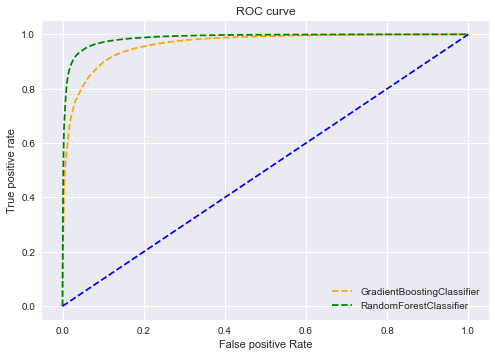

In [194]:
#GradientBoosting vs Random Forest
from sklearn.metrics import roc_curve
model1 = GradientBoostingClassifier()
# knn
model2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)


# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,0], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,0], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GradientBoostingClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

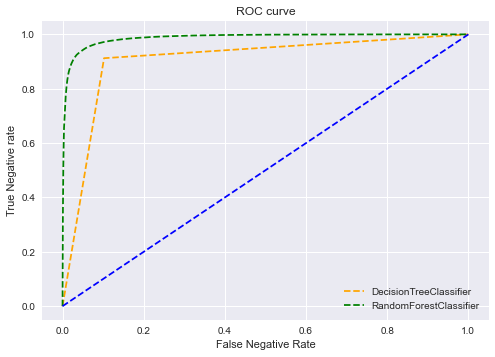

In [193]:
#RandomForestClassifier vs DecisionTreeclassifier
from sklearn.metrics import roc_curve
model1 = DecisionTreeClassifier()
# knn
model2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)


# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,0], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,0], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DecisionTreeClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Negative Rate')
# y label
plt.ylabel('True Negative rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

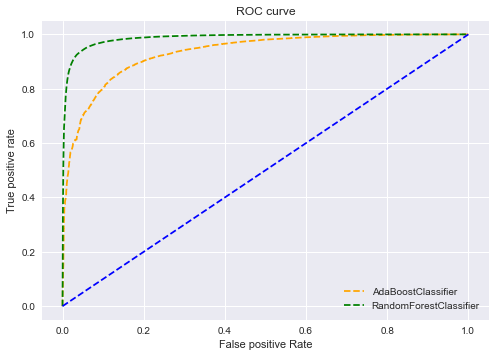

In [192]:
#RandomForestClassifier vs AdaBoostClassifier
from sklearn.metrics import roc_curve
model1 = AdaBoostClassifier()
# knn
model2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)


# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,0], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,0], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AdaBoostClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

THE RANDOM FOREST CLASSIFIER PERFORMED THE BEST IN IDENTIFYING THE 0(DEFAULTERS) CLASS IN THE DATASET AMONGST ALL THE OTHER MODELS.
Also,
The difference between the cv_score and the accuracy_score is not very high.
The recall and f1-score for both the 0 and 1 classes is very good and balanced.
Hence,i have choosen RandomForestClassifier as the best model.

In [200]:
from sklearn.metrics import roc_auc_score

In [207]:
#RandomForest
rr=rfc.predict_proba(x_test)
print('Random Forest test roc-auc: {}'.format(roc_auc_score(y_test, rr[:,1])))

Random Forest test roc-auc: 0.9871270738446035


In [208]:
#adaboost classifier
ada=abc.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ada[:,1])))

Adaboost test roc-auc: 0.9469172369281446


In [210]:
#DecisionTreeClassifier
tree=dtc.predict_proba(x_test)
print('DecisionTreeClassifier test roc-auc: {}'.format(roc_auc_score(y_test, tree[:,1])))

DecisionTreeClassifier test roc-auc: 0.9097514805770698


In [211]:
#GradientBoostingClassifier
gbst=gbc.predict_proba(x_test)
print('GradientBoostingClassifier test roc-auc: {}'.format(roc_auc_score(y_test, gbst[:,1])))

GradientBoostingClassifier test roc-auc: 0.9628719795709024


Our prefered model RandomForestClassifier had the best roc_auc_score too.
Proceeding to hyperparameter tuning the selected model.


HyperParameterTuning RandomForestClassifer using GridSearchCV

In [214]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
parameters={'criterion':['gini','entropy'],'n_estimators':[50,100,150,200,250,300]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
print(grid)
grid.fit(x_train[:20000],y_train[:20000])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [215]:
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)


0.908
150
{'criterion': 'gini', 'n_estimators': 150}


In [217]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.33,random_state=42)

In [218]:
#Tuning the model with the best parameters
best_model=RandomForestClassifier(criterion='gini',n_estimators=150)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("score: ",best_model.score(x_train,y_train))
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


score:  0.9999746045720236
accuracy_score: 0.9464891852641167
[[54639  3509]
 [ 2718 55503]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58148
           1       0.94      0.95      0.95     58221

    accuracy                           0.95    116369
   macro avg       0.95      0.95      0.95    116369
weighted avg       0.95      0.95      0.95    116369



Saving the model using pickle.dump method from the pickle library

In [219]:
import pickle
filename2='micro_credit_defaulter_prediction.sav'
pickle.dump(best_model,open(filename2,'wb'))

Re-Loading the model for testing

In [220]:
load_model=pickle.load(open(filename2,'rb'))

In [231]:
predictions=load_model.predict_proba(x_test[20000:20100])
predictions

array([[0.02666667, 0.97333333],
       [1.        , 0.        ],
       [0.00666667, 0.99333333],
       [0.92666667, 0.07333333],
       [0.02      , 0.98      ],
       [0.02      , 0.98      ],
       [0.06666667, 0.93333333],
       [0.04      , 0.96      ],
       [0.98666667, 0.01333333],
       [0.4       , 0.6       ],
       [0.9       , 0.1       ],
       [0.99333333, 0.00666667],
       [0.74666667, 0.25333333],
       [0.96      , 0.04      ],
       [0.99333333, 0.00666667],
       [0.04666667, 0.95333333],
       [0.05333333, 0.94666667],
       [0.03333333, 0.96666667],
       [0.93333333, 0.06666667],
       [0.06666667, 0.93333333],
       [0.54      , 0.46      ],
       [0.99333333, 0.00666667],
       [0.16      , 0.84      ],
       [0.96      , 0.04      ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.02666667, 0.97333333],
       [0.97333333, 0.02666667],
       [0.02      , 0.98      ],
       [0.96      , 0.04      ],
       [0.

Now displaying the probablity of default in loans and the probablity of success simultaneously for the test data

In [236]:
for i in predictions[:,0]:
    fail=i*100
    print("The probality of the person defaulting in repayment is: ",np.round(fail,2),'%')

The probality of the person defaulting in repayment is:  2.67 %
The probality of the person defaulting in repayment is:  100.0 %
The probality of the person defaulting in repayment is:  0.67 %
The probality of the person defaulting in repayment is:  92.67 %
The probality of the person defaulting in repayment is:  2.0 %
The probality of the person defaulting in repayment is:  2.0 %
The probality of the person defaulting in repayment is:  6.67 %
The probality of the person defaulting in repayment is:  4.0 %
The probality of the person defaulting in repayment is:  98.67 %
The probality of the person defaulting in repayment is:  40.0 %
The probality of the person defaulting in repayment is:  90.0 %
The probality of the person defaulting in repayment is:  99.33 %
The probality of the person defaulting in repayment is:  74.67 %
The probality of the person defaulting in repayment is:  96.0 %
The probality of the person defaulting in repayment is:  99.33 %
The probality of the person defaultin

In [237]:
for i in predictions[:,1]:
    success=i*100
    print("The probablity of successful repayment are: ",np.round(success,2),'%')

The probablity of successful repayment are:  97.33 %
The probablity of successful repayment are:  0.0 %
The probablity of successful repayment are:  99.33 %
The probablity of successful repayment are:  7.33 %
The probablity of successful repayment are:  98.0 %
The probablity of successful repayment are:  98.0 %
The probablity of successful repayment are:  93.33 %
The probablity of successful repayment are:  96.0 %
The probablity of successful repayment are:  1.33 %
The probablity of successful repayment are:  60.0 %
The probablity of successful repayment are:  10.0 %
The probablity of successful repayment are:  0.67 %
The probablity of successful repayment are:  25.33 %
The probablity of successful repayment are:  4.0 %
The probablity of successful repayment are:  0.67 %
The probablity of successful repayment are:  95.33 %
The probablity of successful repayment are:  94.67 %
The probablity of successful repayment are:  96.67 %
The probablity of successful repayment are:  6.67 %
The pro